# Constant Likelihood

Managing plateaus in nested sampling is tricky because the measure of enclosed prior volume is assumed to be monotonically decreasing. In this simple model, the model is simply,

$L(x) = P(y | x) = 1$

and

$P(x) = \mathcal{U}[x \mid 0, 1]$.

The analytic evidence for this model is,

$Z = P(y) = \int_\mathcal{X} L(x) p(x) \,\mathrm{d} x = 1$

## Overview

We'll cover the following topics:

1. Show how likelihood plateaus are handled in JAXNS.

In [1]:

from jaxns import NestedSampler
from jaxns.prior_transforms import PriorChain, UniformPrior
from jaxns.utils import summary
from jaxns.plotting import plot_cornerplot, plot_diagnostics
from jax import random, jit

In [2]:
# A PriorChain holds the definition of your prior. A number of priors are provided, and really complex ones are easy to implement.

# Simple use a PriorChain context like so to define your prior RVs.
with PriorChain() as prior_chain:
    UniformPrior('x', 0., 1.)

# The likelihood is a constant.
def log_likelihood(x):
    return 0.


true_logZ = 0.

print("True logZ={}".format(true_logZ))

INFO[2022-03-25 18:05:18,084]: Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO[2022-03-25 18:05:18,085]: Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Host Interpreter
INFO[2022-03-25 18:05:18,086]: Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
WARNING[2022-03-25 18:05:18,087]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


True logZ=0.0


/home/albert/miniconda3/envs/jax_py/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:3662: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.float64'> requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "zeros")


In [3]:
# Create the nested sampler class. In this case without any tuning.
ns = NestedSampler(log_likelihood, prior_chain)
# We jit-compile
ns = jit(ns)
# We run, with any parameters desired. In this case, without any tuning.
results = ns(random.PRNGKey(42))


WARNING[2022-03-25 18:05:18,147]: Increasing max_samples (100000) by 100 to evenly divide samples_per_step
/home/albert/miniconda3/envs/jax_py/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:3610: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.float64'> requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "asarray")
/home/albert/miniconda3/envs/jax_py/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:3610: UserWarning: Explicitly requested dtype <class 'jax._src.numpy.lax_numpy.int64'> requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/j

In [4]:
# We can use the summary utility to display results
summary(results)

--------
Termination Conditions:
Small remaining evidence
--------
# likelihood evals: 600
# samples: 200
# likelihood evals / sample: 3.0
--------
logZ=-0.0075 +- 0.0055
H=nan
ESS=100
--------
x: mean +- std.dev. | 10%ile / 50%ile / 90%ile | MAP est. | max(L) est.
x: 0.52 +- 0.25 | 0.23 / 0.48 / 0.89 | 0.83 | 0.67
--------


'--------\nTermination Conditions:\nSmall remaining evidence\n--------\n# likelihood evals: 600\n# samples: 200\n# likelihood evals / sample: 3.0\n--------\nlogZ=-0.0075 +- 0.0055\nH=nan\nESS=100\n--------\nx: mean +- std.dev. | 10%ile / 50%ile / 90%ile | MAP est. | max(L) est.\nx: 0.52 +- 0.25 | 0.23 / 0.48 / 0.89 | 0.83 | 0.67\n--------'

WARNING[2022-03-25 18:05:25,945]: No handles with labels found to put in legend.


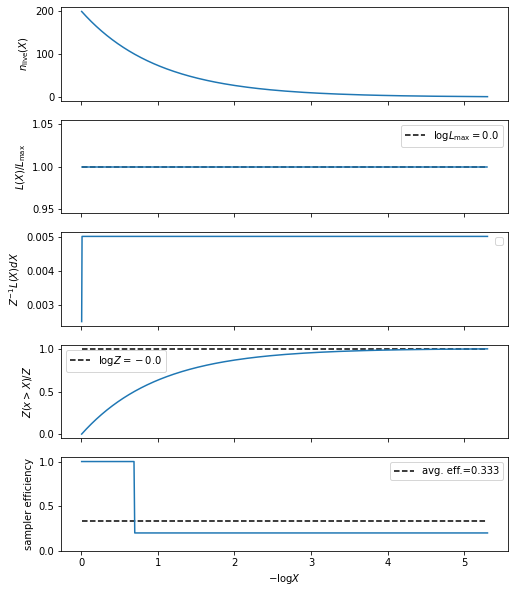

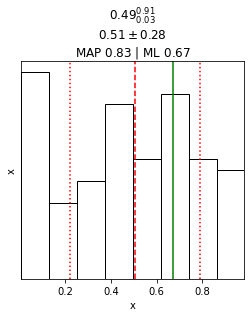

In [5]:
# We plot useful diagnostics and a distribution cornerplot.
plot_diagnostics(results)
plot_cornerplot(results)